In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
docs = ['python flask docker', 'r analytics', 'python mle docker', 'r statistics analytics', 'python flask django',
       'python django twisted', 'python analytics mle docker']
cout_vectorizer = CountVectorizer(ngram_range=(1,1)) 
vectorized = cout_vectorizer.fit_transform(docs)

In [13]:
cooc = (vectorized.T * vectorized).todense()
G = nx.from_numpy_matrix(cooc)

In [14]:
list(zip((i, label) for i, label in enumerate(cout_vectorizer.get_feature_names())))

[((0, 'analytics'),),
 ((1, 'django'),),
 ((2, 'docker'),),
 ((3, 'flask'),),
 ((4, 'mle'),),
 ((5, 'python'),),
 ((6, 'statistics'),),
 ((7, 'twisted'),)]

/home/proto/anaconda3/envs/dl/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


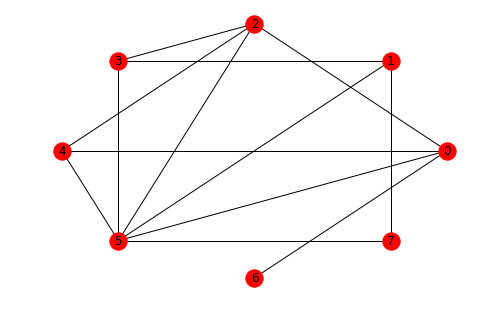

In [15]:
nx.draw(G, nx.circular_layout(G), edges=G.edges, with_labels=True)

In [16]:
nx.clustering(G)

{0: 0.5,
 1: 0.6666666666666666,
 2: 0.6666666666666666,
 3: 0.6666666666666666,
 4: 1.0,
 5: 0.4,
 6: 0,
 7: 1.0}

In [27]:
list(nx.algorithms.community.kclique.k_clique_communities(G, 4))

[frozenset({0, 2, 4, 5})]